<a href="https://colab.research.google.com/github/nicorunini/CCADMACL_EXERCISES_COM231ML/blob/main/exercise1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.express as px

In [97]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [98]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [99]:
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [100]:
df.shape

(200, 5)

Show summary statistics using `describe()`. `(5 pts)`

In [101]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [102]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
AnnualIncome,0
SpendingScore,0


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [103]:
# Rename columns to match the problem description
df.rename(columns={'AnnualIncome': 'Annual Income (k$)', 'SpendingScore': 'Spending Score (1-100)'}, inplace=True)

# Now select the features using the new column names
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
features.head(10)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


Display the first 10 rows. `(5 pts)`

In [104]:
print(features.head(10))

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40
5                  17                      76
6                  18                       6
7                  18                      94
8                  19                       3
9                  19                      72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

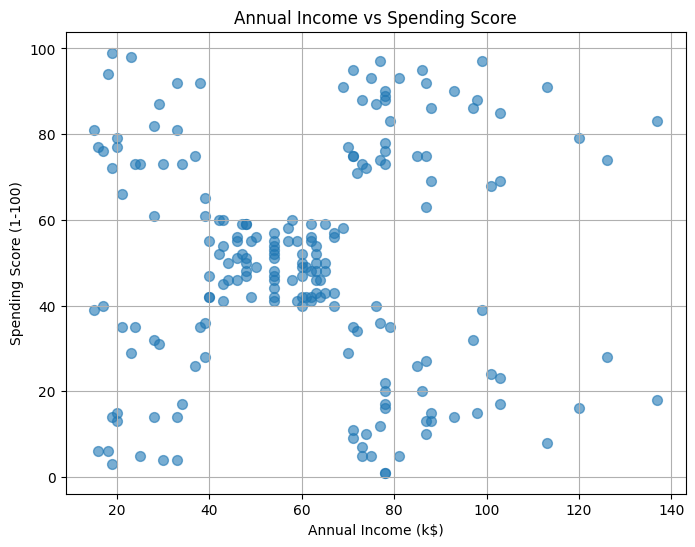

In [105]:
plt.figure(figsize=(8,6))
plt.scatter(features['Annual Income (k$)'], features['Spending Score (1-100)'], s=50, alpha=0.6)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.grid(True)
plt.show()

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

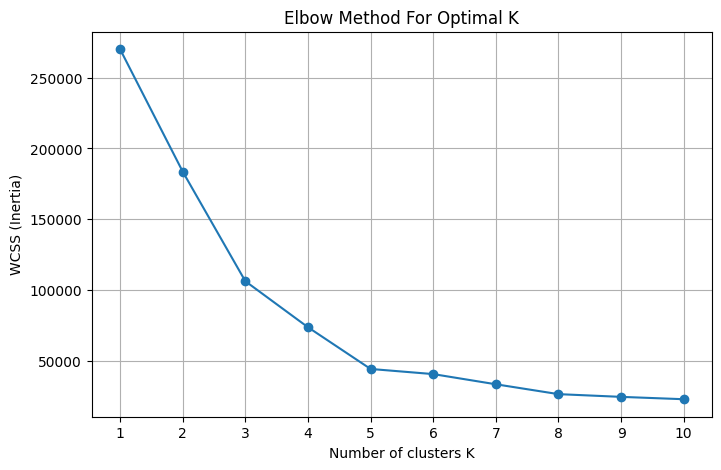

In [106]:
wcss = []
K_range = range(1,11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o')
plt.xticks(K_range)
plt.xlabel('Number of clusters K')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

optimal_k = 5

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [107]:
kmeans_opt = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
labels = kmeans_opt.fit_predict(features)

df['Cluster'] = labels

print('\n--- First 10 labeled rows ---')
print(df[['CustomerID','Genre','Age','Annual Income (k$)','Spending Score (1-100)','Cluster']].head(10))


--- First 10 labeled rows ---
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   
5           6  Female   22                  17                      76   
6           7  Female   35                  18                       6   
7           8  Female   23                  18                      94   
8           9    Male   64                  19                       3   
9          10  Female   30                  19                      72   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  
5        2  
6        4  
7        2  
8        4  
9        2  


## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

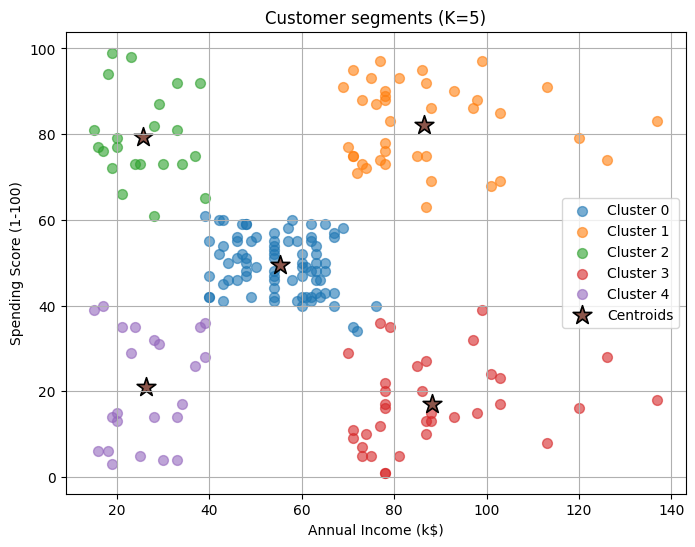

In [108]:
plt.figure(figsize=(8,6))
colors = ['red','blue','green','cyan','magenta','orange','purple','brown','pink','gray']
for i in range(optimal_k):
    cluster_points = features[labels == i]
    plt.scatter(cluster_points['Annual Income (k$)'], cluster_points['Spending Score (1-100)'],
                s=50, label=f'Cluster {i}', alpha=0.6)
# Plot centroids
centroids = kmeans_opt.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], s=200, marker='*', edgecolor='k', linewidth=1.2, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'Customer segments (K={optimal_k})')
plt.legend()
plt.grid(True)
plt.show()

## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users?
- Which cluster represents low income, high spending users?
- Which cluster might represent target customers for promotions?
- What business insights can you derive from the clusters?

### 1. Which cluster represents high income, low spending users?
Cluster 3, which are likely the value-conscious or not engaged
### 2. Which cluster represents low income, high spending users?

Cluster 2, potentially impulsive or targeted shoppers
### 3. Which cluster might represent target customers for promotions?

Cluster 1, best target customers for premium offers and loyalty programs.
### 4. What business insights can you derive from the clusters?

Other clusters represent medium combinations or average customers; insights can feed targeted promotions, personalized discounts, or loyalty tiers.

## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [109]:
features_3d = df[['Age','Annual Income (k$)','Spending Score (1-100)']].copy()
scaler = StandardScaler()
features_3d_scaled = caler.fit_transform(features_3d)

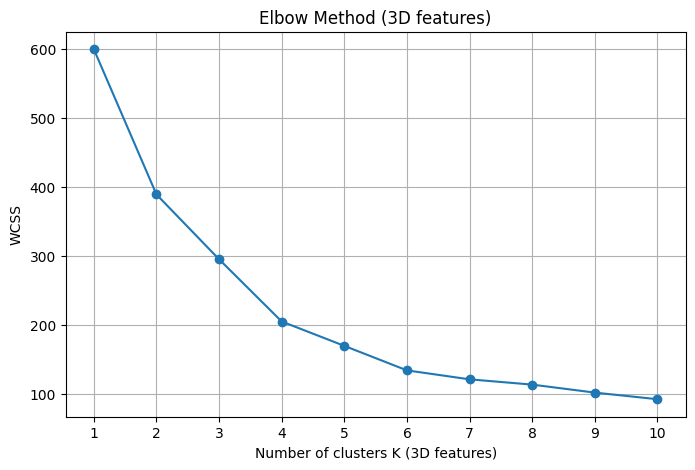

In [110]:
wcss_3d = []
for k in K_range:
    kmeans3 = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans3.fit(features_3d_scaled)
    wcss_3d.append(kmeans3.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss_3d, marker='o')
plt.xticks(K_range)
plt.xlabel('Number of clusters K (3D features)')
plt.ylabel('WCSS')
plt.title('Elbow Method (3D features)')
plt.grid(True)
plt.show()

k3 = 5
kmeans_3d = KMeans(n_clusters=k3, init='k-means++', random_state=42)
labels_3d = kmeans_3d.fit_predict(features_3d_scaled)
df['Cluster3D'] = labels_3d

Visualize using a 3D scatter plot. `(5 pts)`

In [111]:
import plotly.express as px
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
                    color='Cluster3D', title='3D K-Means Model')
fig.show()

## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?
- What business insights can you derive from the clusters in 3D??

### 1.Are there meaningful and distinguishable clusters?
some clusters tend to be younger with higher spending score while others are older with lower spending.
### What business insights can you derive from the clusters in 3D??
the age specific promotions can be used by this data to tailor premium offers to higher-icome and high spenders, and engage low-spend high income with personalized outreach.